In [333]:
# sns.set_style("whitegrid")
# plt.figure()
# axes.set_xticklabels(list(range(min_lat, max_lat, 30)))
# ax = sns.stripplot(x="Latitude", y="Temperature (F)", data=temp_vs_lat_df)

# axes.set_xlim(left=-54, right=80, auto=True)
# plt.show()

In [2]:
#dependencies
import requests
import json
import datetime
import pandas as pd
import random
import numpy as np
from citipy import citipy
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter

In [3]:
counter = 0
city_names = []
while counter < 500:
    lat = random.randrange(-90,90)
    long = random.randrange(-180, 180)
    city = citipy.nearest_city(lat, long)
    if city.city_name not in city_names: 
        city_names.append({"city":city.city_name, "country_code":city.country_code})
        counter+= 1
    
len(city_names)

500

In [4]:
#declare lists to for scatterplots
temp_vs_lat = []
humidity_vs_lat = []
cloudiness_vs_lat = []
wind_speed_vs_lat = []

#variable to store the data
retrieved_data_log = []

In [6]:
api_key = "5a496d19cea198d1a855c13dbc0b8529"
units = "imperial"
counter = 0
#lakatoro, vu
for c in city_names:
    countryCode = c["country_code"]
    city = c["city"]
    target_url = "http://api.openweathermap.org/data/2.5/weather?q={%s},{%s}&mode=json&APPID=%s&units=%s" % (city, countryCode, api_key, units)
    city_weather = requests.get(target_url).json()
    if city_weather["cod"] != "404":
        retrieved_data_log.append({"city": city, "country": countryCode, "url": target_url}) #"city id": city_weather["id"], 
        temp_vs_lat.append({"Temperature (F)":city_weather["main"]["temp_max"],"Latitude":city_weather["coord"]["lat"]})
        humidity_vs_lat.append({"Humidity (%)":city_weather["main"]["humidity"],"Latitude":city_weather["coord"]["lat"]})
        cloudiness_vs_lat.append({"Cloudiness (%)":city_weather["clouds"]["all"],"Latitude":city_weather["coord"]["lat"]})
        wind_speed_vs_lat.append({"Wind Speed (mph)":city_weather["wind"]["speed"], "Latitude":city_weather["coord"]["lat"]})
        time.sleep(3)
        counter += 1

temp_vs_lat_df = pd.DataFrame(temp_vs_lat)

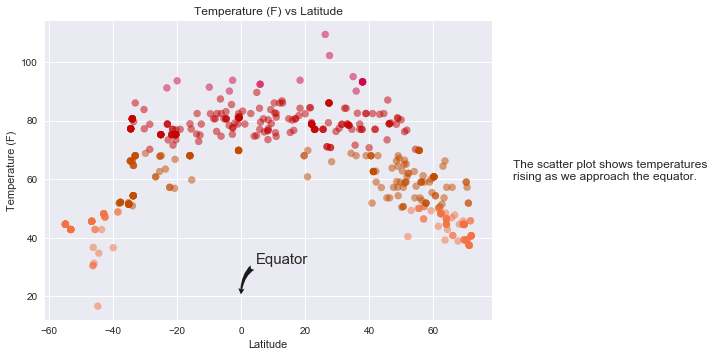

In [17]:
#create a dataframe from the extracted data
temp_vs_lat_df = pd.DataFrame(temp_vs_lat)

#define the colors for ranges in temperature
colors = []
for i in temp_vs_lat_df["Temperature (F)"]:
        if i <= 50:
            colors.append("#f47142")
        elif i <= 70:
            colors.append("#c44c02")
        elif i <= 90:
            colors.append("#c40303")
        else:
            colors.append("#d10445")

#label the axis and create a title for the scatter plot
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


#add an arrow to the scatter plot to show that x=0 is the equator
plt.annotate('Equator',
            xy=(0, 20), xycoords='data',
            xytext=(15, 33), textcoords='offset points',
            size=15,
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.1", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.text(85, 60, "The scatter plot shows temperatures \nrising as we approach the equator.")


#define the data for the scattor plot
plt.scatter(x=temp_vs_lat_df["Latitude"], y=temp_vs_lat_df["Temperature (F)"], c=colors, alpha=0.5)

#show the scatter plot
plt.show()

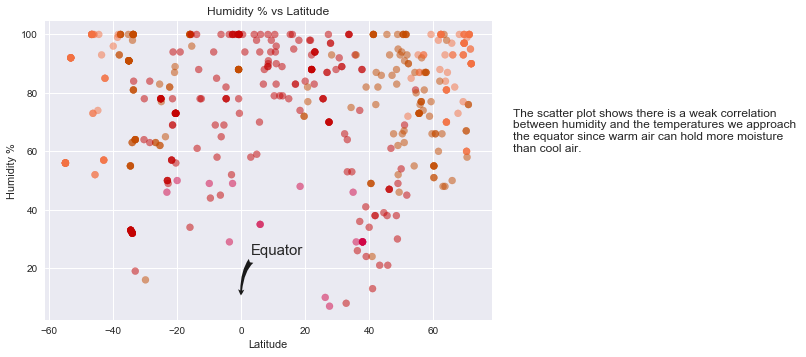

In [22]:
#create a dataframe for the extracted data
humidity_vs_lat_df = pd.DataFrame(humidity_vs_lat)

#label the axis and create a title for the scatter plot
plt.title("Humidity % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

#add an arrow to the scatter plot to show that x=0 is the equator
plt.annotate('Equator',
            xy=(0, 10), xycoords='data',
            xytext=(10, 43), textcoords='offset points',
            size=15,
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.1", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.text(85, 60, "The scatter plot shows there is a weak correlation \nbetween humidity and the temperatures we approach \nthe equator since warm air can hold more moisture \nthan cool air.")


#define the data for the scattor plot
plt.scatter(x=humidity_vs_lat_df["Latitude"], y=humidity_vs_lat_df["Humidity (%)"], c=colors, alpha=0.5)

#show the scatter plot
plt.show()

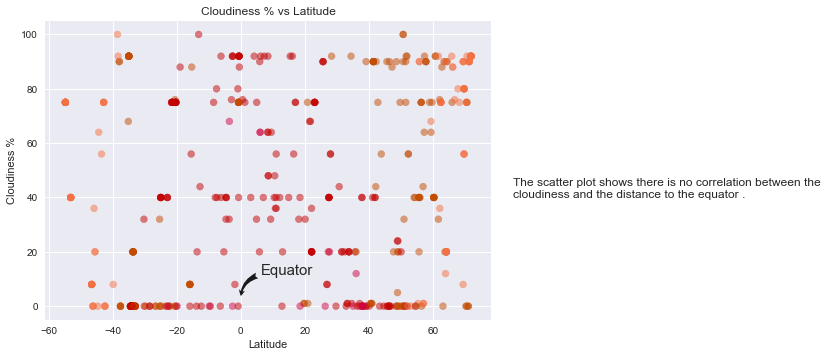

In [23]:
#create a dataframe for the extracted data
cloudiness_vs_lat_df = pd.DataFrame(cloudiness_vs_lat)

#label the axis and create a title for the scatter plot
plt.title("Cloudiness % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

#add an arrow to the scatter plot to show that x=0 is the equator
plt.annotate('Equator',
            xy=(0, 3), xycoords='data',
            xytext=(20, 23), textcoords='offset points',
            size=15,
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.1", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.text(85, 40, "The scatter plot shows there is no correlation between the \ncloudiness and the distance to the equator.")


#define the data for the scattor plot
plt.scatter(x=cloudiness_vs_lat_df["Latitude"], y=cloudiness_vs_lat_df["Cloudiness (%)"], c=colors, alpha=0.5)

#show the scatter plot
plt.show()

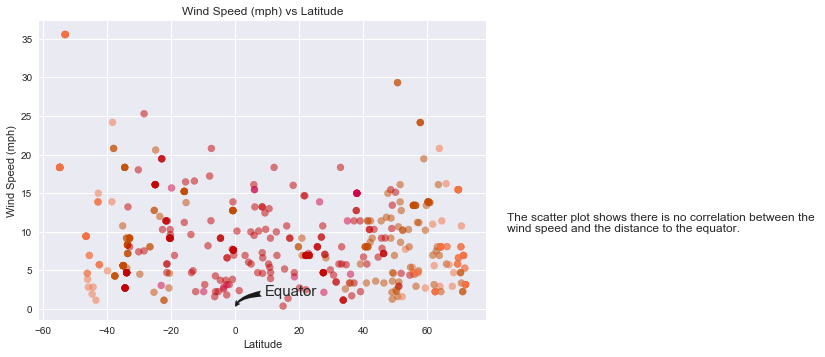

In [25]:
#Wind Speed (mph) (F) vs latitude
wind_speed_vs_lat_df = pd.DataFrame(wind_speed_vs_lat)

#label the axis and create a title for the scatter plot
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#add an arrow to the scatter plot to show that x=0 is the equator
plt.annotate('Equator',
            xy=(0, 0), xycoords='data',
            xytext=(30, 13), textcoords='offset points',
            size=15,
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.1", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.text(85, 10, "The scatter plot shows there is no correlation between the \nwind speed and the distance to the equator.")


#define the data for the scattor plot
plt.scatter(x=wind_speed_vs_lat_df["Latitude"], y=wind_speed_vs_lat_df["Wind Speed (mph)"], c=colors, alpha=0.5)

#show the scatter plot
plt.show()

In [27]:
retrieved_data_log_df = pd.DataFrame(retrieved_data_log).reset_index()
retrieved_data_log_df.head()

,index,city,country,url
0,0,clyde river,ca,http://api.openweathermap.org/data/2.5/weather...
1,1,mehamn,no,http://api.openweathermap.org/data/2.5/weather...
2,2,hengyang,cn,http://api.openweathermap.org/data/2.5/weather...
3,3,clyde river,ca,http://api.openweathermap.org/data/2.5/weather...
4,4,mehamn,no,http://api.openweathermap.org/data/2.5/weather...


In [31]:
#export the weather url into a csv file
file_name = "weather_data_log.csv"
retrieved_data_log_df[["city", "country","url"]].to_csv(file_name, encoding='utf-8')